<a href="https://colab.research.google.com/github/BilalAbuZahra/computer-vision/blob/master/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/Adevrtising (1).csv')
df.head(10)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
df[:10]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


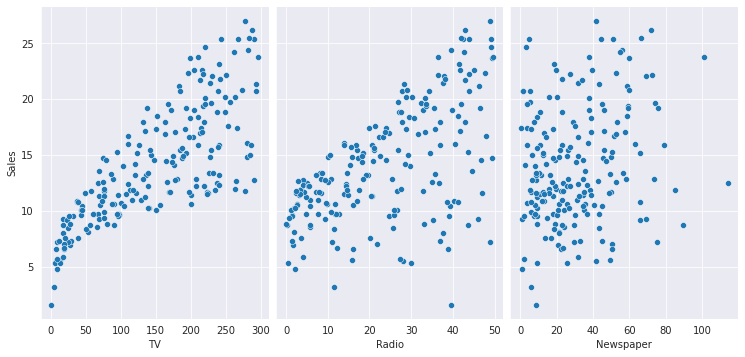

In [56]:
import seaborn as sns
sns.set_style("darkgrid")
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7)


1.2 Simple Linear Regression

In [11]:
feature_cols = ['TV']
X = df[feature_cols]
y = df.Sales
print(f'The type of X is {type(X)}')
print(f'The type of y is {type(y)}')

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


In [19]:
simple_lm = LinearRegression()
simple_lm.fit(X, y)


LinearRegression()

In [20]:
print ("iNTERCEPT : ",simple_lm.intercept_)
print ("CO-EFFICIENT : ",simple_lm.coef_)


iNTERCEPT :  7.032593549127695
CO-EFFICIENT :  [0.04753664]


In [21]:
TV = 230
print(f'Investing {TV} in Tv and Generates {simple_lm.predict([[TV]])} in Sales')


Investing 230 in Tv and Generates [17.96602085] in Sales


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <=235)]

In [23]:
print(f'Mean sales increase {tv_230s.Sales.mean()}')


Mean sales increase 16.5375


In [24]:
predictions = simple_lm.predict(X)


In [25]:
df_eval = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_eval.head()

,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


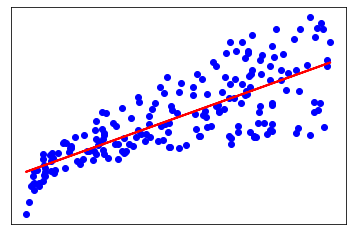

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()


In [69]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))



Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936


In [32]:
import statsmodels.formula.api as sm

lm1 = sm.ols(formula='Sales ~ TV', data=df).fit()

print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [33]:
X_new = pd.DataFrame({'TV': [230]})
lm1.predict(X_new)


0    17.966021
dtype: float64

In [34]:
print(f'The p value is {lm1.pvalues}')


The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [35]:
a = 1.467390e-42
output = f"{a:.50f}"
print('The p-value is ',output)


The p-value is  0.00000000000000000000000000000000000000000146739000


In [36]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [37]:
model = LinearRegression()


In [38]:
model.fit(X, y)
# print the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]


In [39]:
model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs


,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [40]:
TV = 2.75
Radio = 5.3
Newspaper = 1000
print(f'Investing {TV} in Tv and {Radio} in Radio and {Newspaper} in Newspaper \
\n will generate {model.predict([[TV, Radio, Newspaper]])}')


Investing 2.75 in Tv and 5.3 in Radio and 1000 in Newspaper 
 will generate [3.02645819]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))


Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936


In [76]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Root Mean Squared Error: 1.6685701407225697


In [88]:
new_sales = 2.938889369459412 + (0.04576465*TV) + (0.18853002*Radio) - (0. , 00103749*Newspaper)

SyntaxError: ignored

In [ ]:
print(f'The new Sales value is {new_sales}')


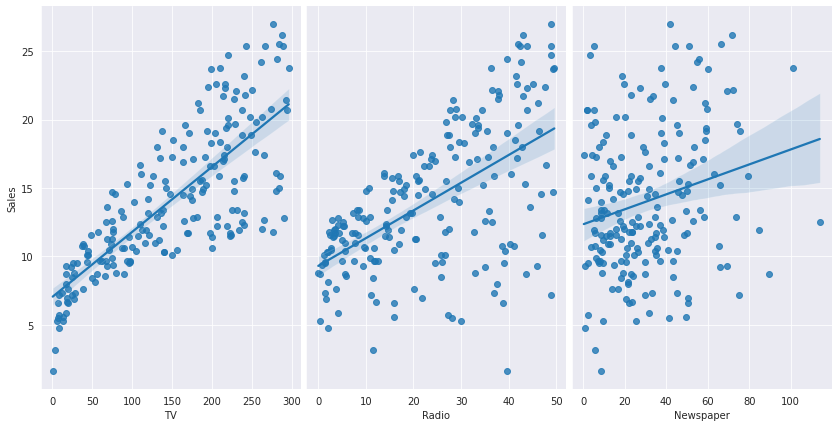

In [93]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6,aspect=0.657, kind='reg')


In [ ]:
!pip install streamlit
!streamlit hello

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.104.241:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!




In [96]:
import streamlit as st 
import numpy as np
import pandas as pd